<a href="https://colab.research.google.com/github/myeongseop2/NIDS_project/blob/main/DDoS/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_DDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/J/0620.csv', sep = ",", low_memory=False)

In [ ]:
#칼럼이 ?인 열 제거
del df['Unnamed: 0']

In [ ]:
del df['normal']

In [ ]:
#상관관계분석

In [ ]:
import pandas as pd 
pd.set_option('display.max_rows', 10000)


In [ ]:
df.corr()["DDOS"].sort_values(ascending=False)


DDOS              1.000000
ACKFlagCnt        0.723469
Down_UpRatio      0.311150
FwdSegSizeMin     0.052687
BwdIATStd         0.004575
FINFlagCnt       -0.001348
BwdPktLenMin     -0.003408
SYNFlagCnt       -0.006463
FwdPSHFlags      -0.006463
URGFlagCnt       -0.007623
BwdIATTot        -0.010795
BwdIATMax        -0.013204
FlowIATMin       -0.017639
FwdIATMin        -0.017648
PktLenMin        -0.031391
FwdPktLenMin     -0.031398
ActiveStd        -0.034544
IdleMin          -0.038241
FlowIATMean      -0.043785
FwdIATMean       -0.043818
ActiveMin        -0.047908
ActiveMax        -0.049021
IdleStd          -0.050956
ActiveMean       -0.051045
IdleMean         -0.051471
FwdIATStd        -0.054518
FlowIATStd       -0.054607
FlowIATMax       -0.054678
FwdIATMax        -0.054797
IdleMax          -0.055571
Protocol         -0.057821
FlowDuration     -0.059035
FwdIATTot        -0.059045
BwdIATMean       -0.072481
BwdPktLenMax     -0.109388
SubflowBwdByts   -0.109498
TotLenBwdPkts    -0.109498
t

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,time,DstPort,Protocol,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,DDOS
count,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845,...,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845,1046845
mean,22354,19620,6,207970,3,1,369,249,367,0,...,20,7534,2594,10053,5455,31457,16053,57325,16362,1
std,3581,27204,0,4630363,1,1,425,326,423,9,...,1,203513,103530,282757,157008,842691,434381,1422354,589949,0
min,15546,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,21640,80,6,1407,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0
50%,22208,80,6,4697,3,0,247,0,32,0,...,20,0,0,0,0,0,0,0,0,1
75%,22735,53571,6,14615,5,2,935,316,935,0,...,20,0,0,0,0,0,0,0,0,1
max,104321,65534,17,119999976,148,124,13488,9121,2224,976,...,44,20000000,16200000,28000000,20000000,106000000,50300000,106000000,106000000,1


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df
df.shape

(1046845, 80)

In [ ]:
test = df.copy()

In [ ]:
x = test.drop(['DDOS'], axis =1)
y = test['DDOS']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 11)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(732791, 79)
(314054, 79)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(732791,)
(314054,)


In [ ]:
cols = x_train.columns

In [ ]:
# #스케일링
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [ ]:
#그리드서치
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [ ]:
# 랜덤포레스트 모델 학습
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


In [ ]:
rf_1=RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_leaf=8,
                           min_samples_split=8, random_state=0)
rf_1.fit(x_train,y_train)
pred=rf_1.predict(x_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9981


In [ ]:
# 의사결정나무 100개 지정. 학습 n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=43)
# fit the model to the training set
rfc_100.fit(x_train, y_train)

RandomForestClassifier(random_state=43)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=3,#min_samples_splt값수정할것 작게설정할수록과적합^l
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

RandomForestClassifier(min_samples_split=3, random_state=43)

In [ ]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(x_test)

In [ ]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108819
           1       1.00      1.00      1.00    205235

    accuracy                           1.00    314054
   macro avg       1.00      1.00      1.00    314054
weighted avg       1.00      1.00      1.00    314054



In [ ]:
#피처확인
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=11)
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=11)

In [ ]:
print("특성 중요도 : \n{}".format(clf.feature_importances_))

특성 중요도 : 
[9.13235366e-03 6.94988512e-02 3.02428104e-07 5.34921900e-04
 1.04179708e-01 5.17434995e-03 7.46577213e-02 3.92975405e-05
 6.94210019e-02 1.81436792e-07 3.96742823e-02 2.97305015e-02
 2.59971598e-05 3.02440097e-07 4.82887569e-03 4.77226281e-03
 1.99918628e-06 2.76521657e-04 1.41207485e-04 1.58796825e-02
 6.23075051e-04 5.18312917e-03 5.38122275e-04 3.13722344e-04
 1.10674715e-02 2.17188657e-04 2.99267428e-02 5.14730871e-03
 5.52925669e-06 4.31907666e-03 4.95420405e-06 1.96472422e-02
 9.67716291e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19679693e-01 1.41711786e-04 4.38152808e-04 1.98470733e-05
 2.71782520e-06 5.14163018e-06 5.23208015e-03 1.00837483e-06
 6.04164300e-08 0.00000000e+00 1.75318054e-06 1.57353156e-13
 1.30478644e-10 1.57046268e-02 1.26932050e-06 0.00000000e+00
 5.31715047e-06 2.77899750e-07 2.04920016e-06 6.94274109e-02
 1.90342033e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39985793e-01
 6.97499668e-0

In [ ]:

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores[:80]

SubflowFwdPkts    1.399858e-01
FwdHeaderLen      1.196797e-01
TotFwdPkts        1.041797e-01
TotLenFwdPkts     7.465772e-02
SubflowFwdByts    6.974997e-02
DstPort           6.949885e-02
FwdSegSizeAvg     6.942741e-02
FwdPktLenMax      6.942100e-02
InitBwdWinByts    4.437652e-02
FwdPktLenMean     3.967428e-02
FwdIATMin         2.992674e-02
FwdPktLenStd      2.973050e-02
BwdIATMin         1.964724e-02
BwdSegSizeAvg     1.903420e-02
FlowIATStd        1.587968e-02
ACKFlagCnt        1.570463e-02
FwdIATStd         1.106747e-02
time              9.132354e-03
InitFwdWinByts    5.782744e-03
PktLenMean        5.232080e-03
FlowIATMin        5.183129e-03
TotBwdPkts        5.174350e-03
SubflowBwdPkts    5.168185e-03
BwdIATTot         5.147309e-03
BwdPktLenMean     4.828876e-03
BwdPktLenStd      4.772263e-03
BwdIATStd         4.319077e-03
FlowIATMax        6.230751e-04
FwdIATTot         5.381223e-04
FlowDuration      5.349219e-04
FwdPkts_s         4.381528e-04
FwdIATMean        3.137223e-04
FlowPkts

In [ ]:
feature_scores

SubflowFwdPkts    1.399858e-01
FwdHeaderLen      1.196797e-01
TotFwdPkts        1.041797e-01
TotLenFwdPkts     7.465772e-02
SubflowFwdByts    6.974997e-02
DstPort           6.949885e-02
FwdSegSizeAvg     6.942741e-02
FwdPktLenMax      6.942100e-02
InitBwdWinByts    4.437652e-02
FwdPktLenMean     3.967428e-02
FwdIATMin         2.992674e-02
FwdPktLenStd      2.973050e-02
BwdIATMin         1.964724e-02
BwdSegSizeAvg     1.903420e-02
FlowIATStd        1.587968e-02
ACKFlagCnt        1.570463e-02
FwdIATStd         1.106747e-02
time              9.132354e-03
InitFwdWinByts    5.782744e-03
PktLenMean        5.232080e-03
FlowIATMin        5.183129e-03
TotBwdPkts        5.174350e-03
SubflowBwdPkts    5.168185e-03
BwdIATTot         5.147309e-03
BwdPktLenMean     4.828876e-03
BwdPktLenStd      4.772263e-03
BwdIATStd         4.319077e-03
FlowIATMax        6.230751e-04
FwdIATTot         5.381223e-04
FlowDuration      5.349219e-04
FwdPkts_s         4.381528e-04
FwdIATMean        3.137223e-04
FlowPkts

In [ ]:
# 특성 중요도 시각화 하기

def plot_feature_importances_ddos(model):
    
    plt.figure(figsize=(6,15))

    n_features = x.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cols)

    plt.xlabel("ddos importances")

    plt.ylabel("columns")

    plt.ylim(-1, n_features)
plt.show()

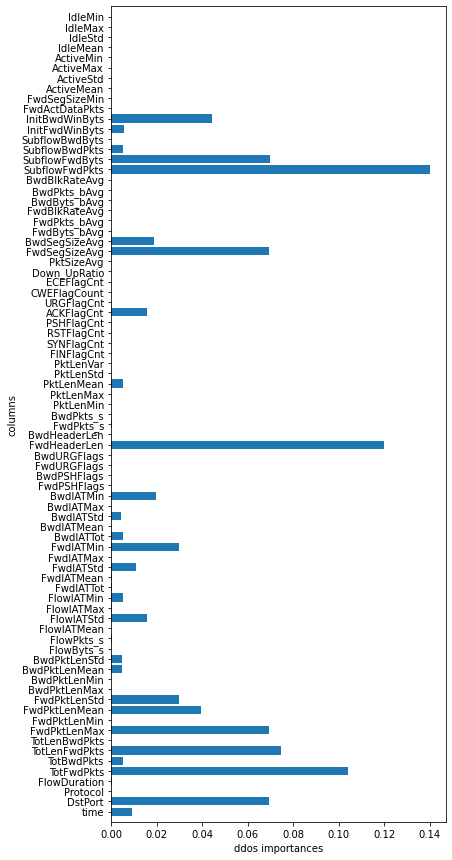

In [ ]:
plot_feature_importances_ddos(clf)

In [ ]:
TS = feature_scores

In [ ]:
#create new df 
ts = pd.DataFrame({'feature_scores':TS})
print (ts)

                feature_scores
SubflowFwdPkts    1.399858e-01
FwdHeaderLen      1.196797e-01
TotFwdPkts        1.041797e-01
TotLenFwdPkts     7.465772e-02
SubflowFwdByts    6.974997e-02
DstPort           6.949885e-02
FwdSegSizeAvg     6.942741e-02
FwdPktLenMax      6.942100e-02
InitBwdWinByts    4.437652e-02
FwdPktLenMean     3.967428e-02
FwdIATMin         2.992674e-02
FwdPktLenStd      2.973050e-02
BwdIATMin         1.964724e-02
BwdSegSizeAvg     1.903420e-02
FlowIATStd        1.587968e-02
ACKFlagCnt        1.570463e-02
FwdIATStd         1.106747e-02
time              9.132354e-03
InitFwdWinByts    5.782744e-03
PktLenMean        5.232080e-03
FlowIATMin        5.183129e-03
TotBwdPkts        5.174350e-03
SubflowBwdPkts    5.168185e-03
BwdIATTot         5.147309e-03
BwdPktLenMean     4.828876e-03
BwdPktLenStd      4.772263e-03
BwdIATStd         4.319077e-03
FlowIATMax        6.230751e-04
FwdIATTot         5.381223e-04
FlowDuration      5.349219e-04
FwdPkts_s         4.381528e-04
FwdIATMe

In [ ]:
ts

,feature_scores
SubflowFwdPkts,1.399858e-01
FwdHeaderLen,1.196797e-01
TotFwdPkts,1.041797e-01
TotLenFwdPkts,7.465772e-02
SubflowFwdByts,6.974997e-02
DstPort,6.949885e-02
FwdSegSizeAvg,6.942741e-02
FwdPktLenMax,6.942100e-02
InitBwdWinByts,4.437652e-02
FwdPktLenMean,3.967428e-02


In [ ]:
# 데이터 df를 year 컬럼의 값을 기준으로 정렬합니다.
# 기본 정렬 방식은 오름차순(ascending)입니다.
# 내림차순으로 정렬하고 싶다면 ascending 옵션을 False로 설정하면 됩니다.
df_sorted_by_values = ts.sort_values(by='feature_scores' ,ascending=False)

# 정렬 결과를 출력합니다.
df_sorted_by_values.head

<bound method NDFrame.head of                 feature_scores
SubflowFwdPkts    1.399858e-01
FwdHeaderLen      1.196797e-01
TotFwdPkts        1.041797e-01
TotLenFwdPkts     7.465772e-02
SubflowFwdByts    6.974997e-02
DstPort           6.949885e-02
FwdSegSizeAvg     6.942741e-02
FwdPktLenMax      6.942100e-02
InitBwdWinByts    4.437652e-02
FwdPktLenMean     3.967428e-02
FwdIATMin         2.992674e-02
FwdPktLenStd      2.973050e-02
BwdIATMin         1.964724e-02
BwdSegSizeAvg     1.903420e-02
FlowIATStd        1.587968e-02
ACKFlagCnt        1.570463e-02
FwdIATStd         1.106747e-02
time              9.132354e-03
InitFwdWinByts    5.782744e-03
PktLenMean        5.232080e-03
FlowIATMin        5.183129e-03
TotBwdPkts        5.174350e-03
SubflowBwdPkts    5.168185e-03
BwdIATTot         5.147309e-03
BwdPktLenMean     4.828876e-03
BwdPktLenStd      4.772263e-03
BwdIATStd         4.319077e-03
FlowIATMax        6.230751e-04
FwdIATTot         5.381223e-04
FlowDuration      5.349219e-04
FwdPkts_s

In [ ]:
ts.apply(lambda s: s.apply('{0:.3f}'.format))

,feature_scores
SubflowFwdPkts,0.140
FwdHeaderLen,0.120
TotFwdPkts,0.104
TotLenFwdPkts,0.075
SubflowFwdByts,0.070
DstPort,0.069
FwdSegSizeAvg,0.069
FwdPktLenMax,0.069
InitBwdWinByts,0.044
FwdPktLenMean,0.040
